In [1]:
import sys
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import datetime
from datetime import date
import math

import get_Haukeli_obs_data as obsDat
import TPU_savefig as PF
import calc_date as cd
import save_fig as SF
import createFolder as cF


In [2]:
sfig = 0
txtdir = '../../Data/eklima'
txt_filename = 'Observations-hour_minutes.txt'
figdir = '../../Figures/Haukeli_weathermast'
cF.createFolder(figdir)
form = 'png'

In [3]:
### define colors for colorbar
champ = 255
blue = np.array([1,74,159])/champ           # for the date



In [4]:
### Mean wind speed and direction
# http://www.intellovations.com/2011/01/16/wind-observation-calculations-in-fortran-and-python/


In [5]:
Haukeli = pd.read_csv('%s/%s' %(txtdir, txt_filename),\
                    sep = ';',header=19, skipfooter = 11, engine= 'python')

In [6]:
#pd.DataFrame(Haukeli)

In [7]:
DateHour = Haukeli['Date-Hour(UTC)']

RR_1 = Haukeli['RR_1'].astype(float)           # Precipitation (1 hour); [mm]
TA = Haukeli['TA'].astype(float)               # Air temperature; [deg C] 

FF = Haukeli['FF'].astype(float)         # Wind speed (10 meters above ground); [m/s]
DD = Haukeli['DD'].astype(float)     # Wind direction (FF); [degrees]

In [8]:
idxFF = np.where(FF[:] == -9999)
idxDD = np.where(DD[:] == -9999)

FF[idxFF[0][:]] = np.nan
DD[idxDD[0][:]] = np.nan

### calculate the U, V wind component for barb plot
# http://colaweb.gmu.edu/dev/clim301/lectures/wind/wind-uv.html

# first calculate the mathematical wind direction in deg
md_deg = 270 - DD
for k in range(0,md_deg.shape[0]):
    if md_deg[k] <0 :
        md_deg[k] = md_deg[k] +360
md_rad = math.pi/180. * md_deg
uwind = FF*np.cos(md_rad)
vwind = FF*np.sin(md_rad)

In [9]:
precip, dt_precip, hour_precip, day_precip, month_precip, year_precip = obsDat.valid_values(RR_1, DateHour)
temp, dt_temp, hour_temp, day_temp, month_temp, year_temp = obsDat.valid_values(TA, DateHour)
U_wind, V_wind, dt_wind, hour_wind, day_wind, month_wind, year_wind = obsDat.valid_values_wind(uwind, vwind, DateHour)


In [11]:
temp[24]

array([-3.2, -3. , -3.1, -2.9, -2.6, -2.8, -2.2, -2.2, -1.8, -1.2, -1. ,
        1.6,  3.5,  4.1,  3.7,  4.3,  4.1,  4.4,  4. ,  3.1,  2.1,  0.4,
       -0.5, -0.8])

In [37]:

PSD = []
for i in range(20,25):
    T_N0 = (-0.07193*temp[i]+2.665)
    T_lam = (-0.03053*temp[24]-0.08258)
    N0 = (np.exp(T_N0))
    lam = (np.exp(T_lam))
    PSD.append((N0)*np.exp(-(lam)))

In [38]:
np.asarray(PSD).shape

(5, 24)

In [31]:
np.asarray(PSD).shape

(5, 24)

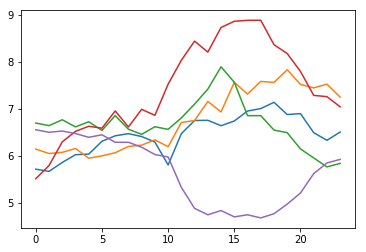

In [43]:
for i in range(0,5):
    plt.plot(np.arange(0,24),PSD[i])